In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

name = "primary_total_market"
BASE = Path("../../data")
print(BASE)
price_file = BASE / f"{name}_prices_monthly.csv"
returns_file = BASE / f"{name}_returns_monthly.csv"


..\..\data


In [58]:
rets = pd.read_csv(returns_file, index_col=0, parse_dates=True)
act_price = pd.read_csv(price_file, index_col=0, parse_dates=True)


In [59]:
growth = (1 + rets).cumprod()


In [60]:
growth

,BND,GLD,TIP,TLT,VEU,VGT
Date,,,,,,
2007-04-11,0.997342,0.998809,0.998406,0.999314,0.995959,0.990873
2007-04-12,0.997208,0.997469,0.998406,0.999543,1.001469,1.000186
2007-04-13,0.995614,1.010125,0.995915,0.996455,1.005511,1.002794
2007-04-16,0.996545,1.018463,0.999103,1.001945,1.020573,1.010802
2007-04-17,0.999070,1.012507,0.999701,1.007550,1.014879,1.013037
...,...,...,...,...,...,...
2025-12-23,1.766195,6.159023,1.892714,1.779016,2.306253,16.734030
2025-12-24,1.770491,6.133561,1.896678,1.789792,2.307817,16.762247
2025-12-26,1.770491,6.205181,1.896505,1.783895,2.315329,16.780839


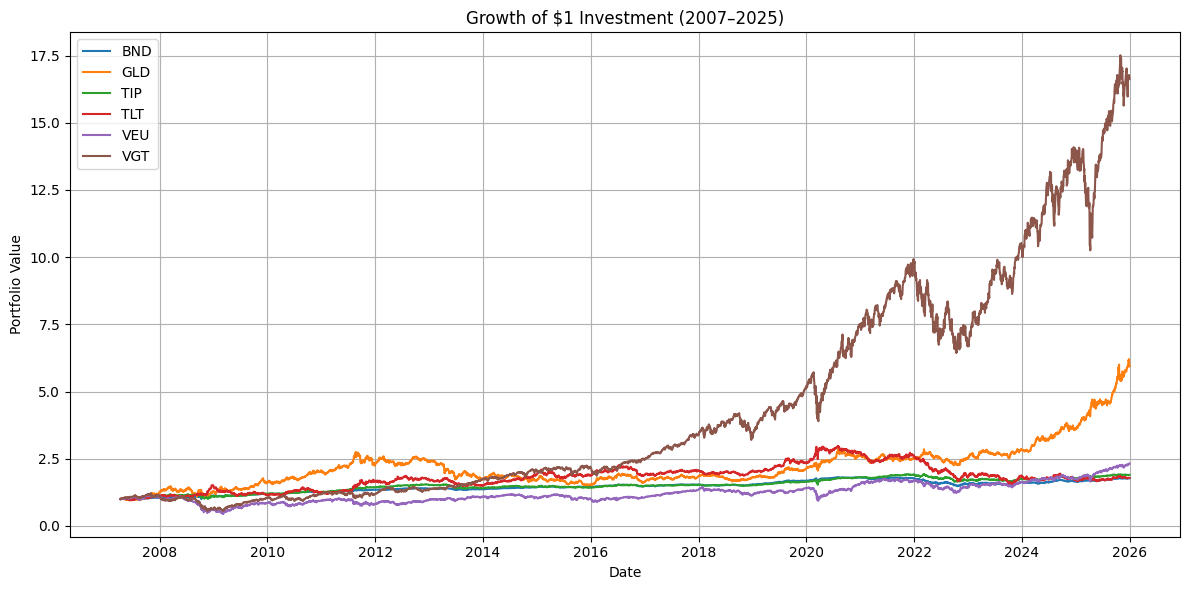

In [61]:
plt.figure(figsize=(12,6))

for col in growth.columns:
    plt.plot(growth.index, growth[col], label=col)

plt.title("Growth of $1 Investment (2007–2025)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


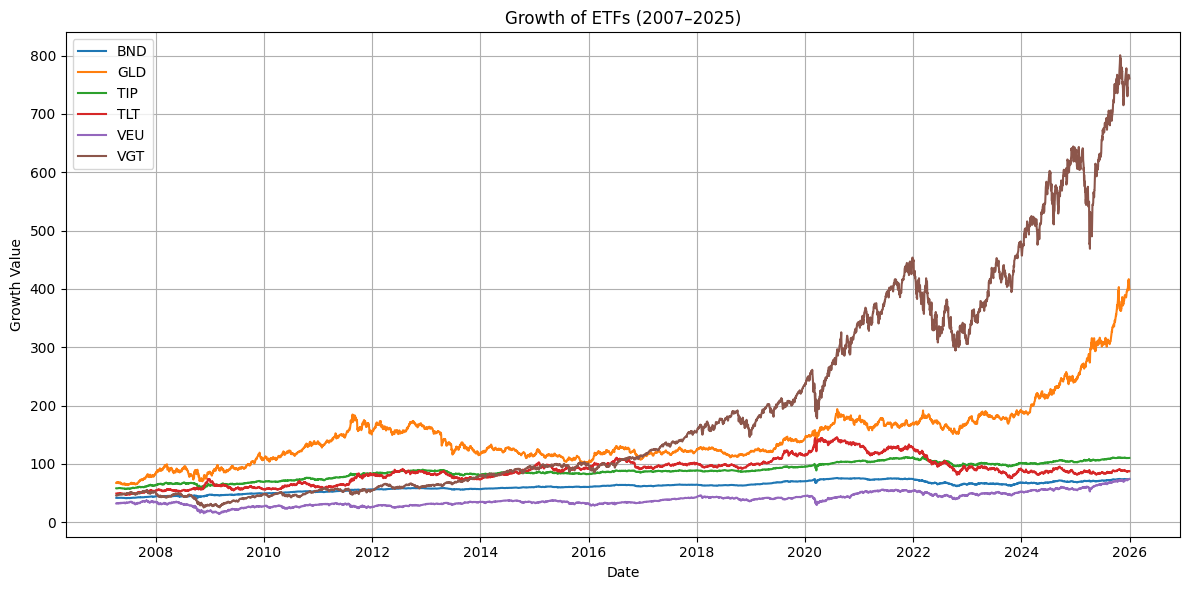

In [62]:
plt.figure(figsize=(12,6))

for col in act_price.columns:
    plt.plot(act_price.index, act_price[col], label=col)

plt.title("Growth of ETFs (2007–2025)")
plt.xlabel("Date")
plt.ylabel("Growth Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\AKhadka2\AppData\Local\Temp\ipykernel_45352\3010312363.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  growth_m = growth.resample("M").last()


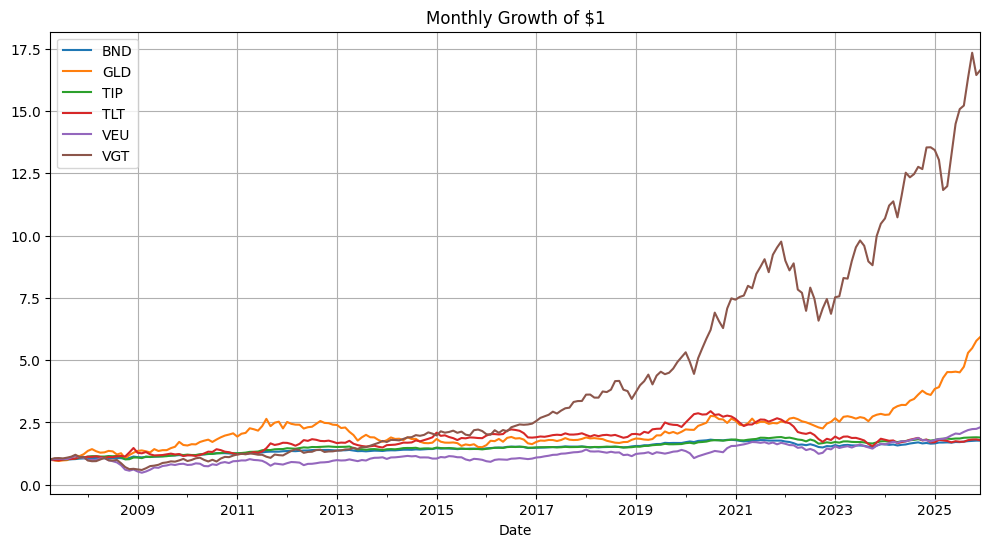

In [63]:
growth_m = growth.resample("M").last()
growth_m.plot(figsize=(12,6), grid=True, title="Monthly Growth of $1")
plt.show()


# Equally Weighted

In [ ]:
rets = pd.read_csv(returns_file,
                   index_col=0,
                   parse_dates=True)

port_ret = rets.mean(axis=1)   # equal weights


In [65]:
port_growth = (1 + port_ret).cumprod()


In [66]:
port_ret

Date
2007-04-11   -0.003216
2007-04-12    0.002281
2007-04-13    0.002025
2007-04-16    0.006811
2007-04-17   -0.000082
                ...   
2025-12-23    0.004530
2025-12-24    0.001469
2025-12-26    0.002109
2025-12-29   -0.007632
2025-12-30   -0.000563
Length: 4712, dtype: float64

In [67]:
port_growth

Date
2007-04-11    0.996784
2007-04-12    0.999057
2007-04-13    1.001080
2007-04-16    1.007898
2007-04-17    1.007816
                ...   
2025-12-23    4.039869
2025-12-24    4.045803
2025-12-26    4.054337
2025-12-29    4.023395
2025-12-30    4.021132
Length: 4712, dtype: float64

In [68]:
port_perf_pct = (port_growth - 1) * 100

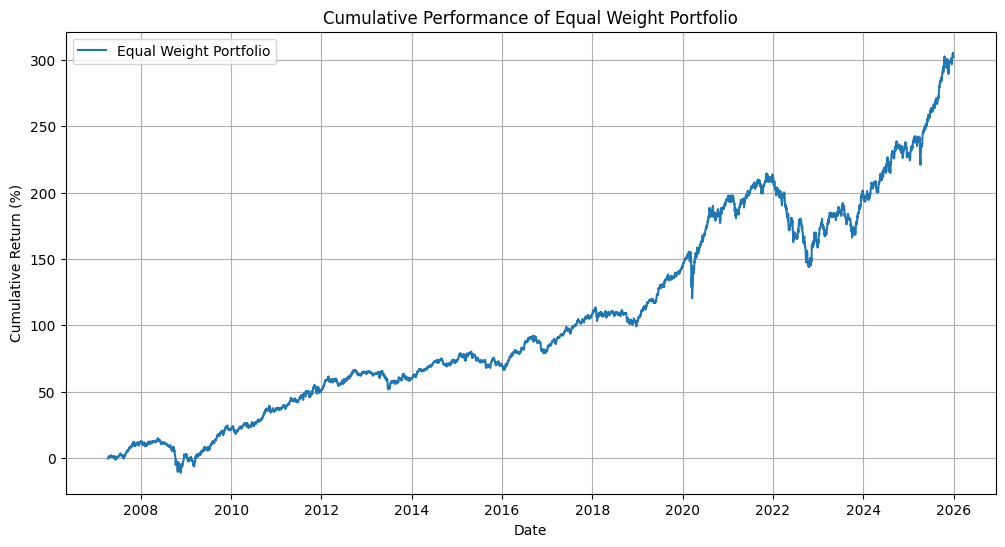

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(port_perf_pct.index, port_perf_pct, label="Equal Weight Portfolio")
plt.ylabel("Cumulative Return (%)")
plt.xlabel("Date")
plt.title("Cumulative Performance of Equal Weight Portfolio")
plt.legend()
plt.grid(True)
plt.show()


In [71]:
rets = pd.read_csv(returns_file,
                   index_col=0,
                   parse_dates=True)

# equal weight allocation
n = rets.shape[1]
weights = pd.Series(1/n, index=rets.columns) * 100   # %

# volatility (annualized)
vol = rets.std() * np.sqrt(252) * 100   # % annual risk if daily data
# if monthly data use sqrt(12) instead


In [72]:
stats = pd.DataFrame({
    "Allocation %": weights,
    "Volatility %": vol
})

stats


,Allocation %,Volatility %
BND,16.666667,5.233340
GLD,16.666667,17.491553
TIP,16.666667,6.358341
TLT,16.666667,15.272108
VEU,16.666667,21.931454
VGT,16.666667,23.584935


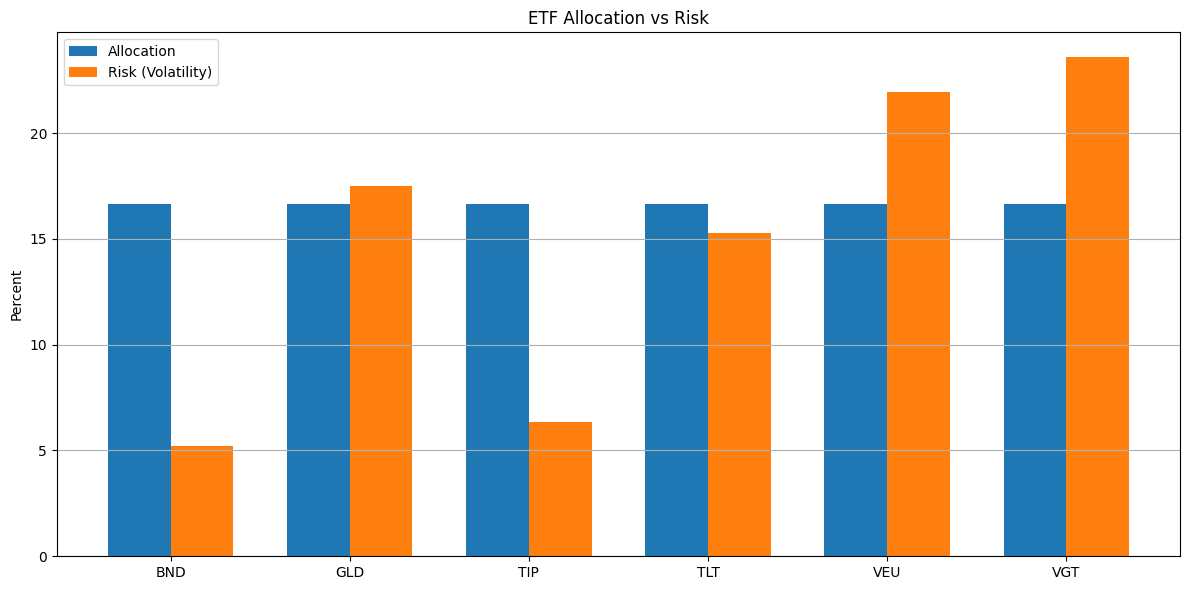

In [73]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(stats.index))
width = 0.35

ax.bar(x - width/2, stats["Allocation %"], width, label="Allocation")
ax.bar(x + width/2, stats["Volatility %"], width, label="Risk (Volatility)")

ax.set_xticks(x)
ax.set_xticklabels(stats.index)
ax.set_ylabel("Percent")
ax.set_title("ETF Allocation vs Risk")
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()
